## Classification: good or malicious packages

**Dataset analysis**

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NF-UQ-NIDS-v2.csv', nrows = 70000)

In [3]:
print(df.keys())
df.shape

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack', 'Dataset'],
      dtype='ob

(70000, 46)

In [4]:
print(df)

         IPV4_SRC_ADDR  L4_SRC_PORT  IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  \
0      192.168.100.148        65389  192.168.100.7           80         6   
1      192.168.100.148        11154  192.168.100.5           80         6   
2         192.168.1.31        42062   192.168.1.79         1041         6   
3         192.168.1.34        46849   192.168.1.79         9110         6   
4         192.168.1.30        50360  192.168.1.152         1084         6   
...                ...          ...            ...          ...       ...   
69995  192.168.100.147        33863  192.168.100.5           80         6   
69996  192.168.100.147        11643  192.168.100.3           80        17   
69997     172.31.64.76        49510    23.36.34.30           80         6   
69998  192.168.100.147        59460  192.168.100.3        35735         6   
69999     192.168.1.39        34016  52.28.231.150           80         6   

       L7_PROTO  IN_BYTES  IN_PKTS  OUT_BYTES  OUT_PKTS  ...  TCP_WIN_MAX_O

In [5]:
print(df.describe())

        L4_SRC_PORT   L4_DST_PORT      PROTOCOL      L7_PROTO      IN_BYTES  \
count  70000.000000  70000.000000  70000.000000  70000.000000  7.000000e+04   
mean   40474.093229   3318.834543     10.235929     53.342837  8.368201e+02   
std    18404.328368  10634.265648      5.827769     78.872000  3.481296e+04   
min        0.000000      0.000000      1.000000      0.000000  4.000000e+00   
25%    27382.500000     80.000000      6.000000      0.000000  5.600000e+01   
50%    45860.500000     80.000000      6.000000      7.000000  1.120000e+02   
75%    55093.250000    443.000000     17.000000     91.290000  2.800000e+02   
max    65535.000000  65534.000000    253.000000    244.000000  6.493320e+06   

             IN_PKTS     OUT_BYTES      OUT_PKTS     TCP_FLAGS  \
count   70000.000000  7.000000e+04  70000.000000  70000.000000   
mean        9.219871  2.521351e+03      4.163643     24.301857   
std       559.636222  1.365147e+05     93.981659     58.547332   
min         1.000000  0.

In [6]:
print(len(df[df['Label'] == 0])) # Good
print(len(df[df['Label'] == 1])) # Malicious
df.drop(columns=['Attack', 'Dataset'], inplace = True)

23157
46843


In [7]:
# Select only columns with non-numeric (character) data types
non_numeric_columns = df.select_dtypes(exclude=[np.number])

# Drop non-numeric columns from the DataFrame
df = df.drop(columns=non_numeric_columns.columns)

to_drop_other = ['DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'L4_SRC_PORT', 'L4_DST_PORT' ]
df = df.drop(columns=to_drop_other)

df.duplicated().sum()
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))

print(df.keys())
print()
print(df.info()) #No missing data

70000
21947
Index(['PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE',
       'Label'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 21947 entries, 0 to 69999
Data columns (total 38 columns):
 #

In [8]:
print(df.shape)
print(len(df[df['Label'] == 0])) # Good
print(len(df[df['Label'] == 1])) # Malicious

(21947, 38)
9887
12060


The dataset is complete with no missing data, it initially consisted of 46 columns, for analysis purposes keys that could influence the classification process were removed. The number of columns used as features for classification is 38. 70000 records were considered, however, following the removal of some keys, it is likely that several duplicate rows were generated in the dataset. In order to mitigate the potential negative impact on any classification models used, the duplicate rows were removed from the dataset.

In [9]:
X = df.drop(columns=['Label']).astype('float32')
y = df['Label'].astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Classification

**SVC**

In [10]:
# Create and train the SVC model.
svc_classifier  = SVC(kernel='rbf', random_state=42) #rbf
cross_val_scores = cross_val_score(svc_classifier, X_train, y_train, cv=5)
cross_val_accuracy = cross_val_scores.mean()
print("Cross-validation accuracy:", cross_val_accuracy)
svc_classifier.fit(X_train, y_train)
y_pred_test = svc_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred_test)
print("F1-score:", f1)
# Calculate the predicted probabilities of positive classes for AUC-ROC
y_proba_test = svc_classifier.decision_function(X_test)
auc_roc = roc_auc_score(y_test, y_proba_test)
print("AUC-ROC:", auc_roc)

Cross-validation accuracy: 0.5499230858564266
Test accuracy: 0.5482915717539864
Precision: 0.5482915717539864
Recall: 1.0
F1-score: 0.7082536413123437
AUC-ROC: 0.5


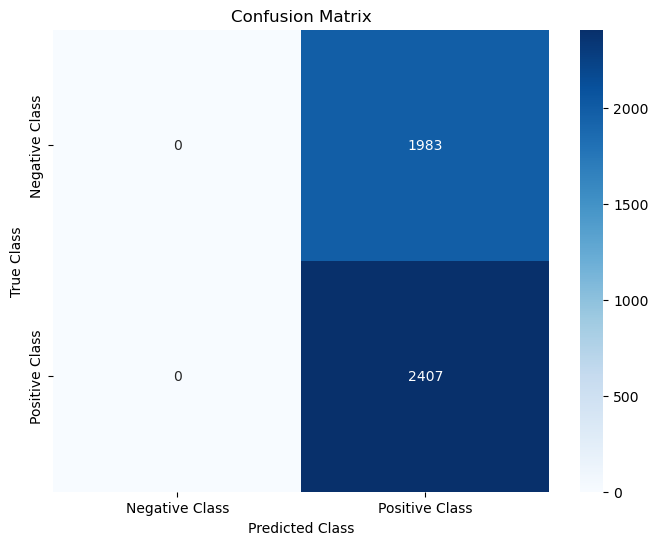

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative Class', 'Positive Class'], 
            yticklabels=['Negative Class', 'Positive Class'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

The metrics suggest that the model has a random predictive ability, it has difficulty detecting malicious packages in the test data.

In [12]:
param_grid = {'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
# Create and train the SVC model.
svc_classifier = SVC(kernel = 'rbf', random_state = 42) #rbf 

# Train the model using the best parameters found. 
grid_search = GridSearchCV(svc_classifier, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameter found:", best_params)

best_svc_classifier = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_svc_classifier, X_train, y_train, cv = 5)
cross_val_accuracy = cross_val_scores.mean()
print("Cross-validation accuracy:", cross_val_accuracy)

y_pred_test = best_svc_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred_test)
print("F1-score:", f1)
# Calculate the predicted probabilities of positive classes for AUC-ROC
y_proba_test = best_svc_classifier.decision_function(X_test)
auc_roc = roc_auc_score(y_test, y_proba_test)
print("AUC-ROC:", auc_roc)

Best hyperparameter found: {'gamma': 0.0001}
Cross-validation accuracy: 0.8166548640815815
Test accuracy: 0.8216400911161731
Precision: 0.9782096584216725
Recall: 0.6900706273369339
F1-score: 0.8092570036540804
AUC-ROC: 0.908124018846527


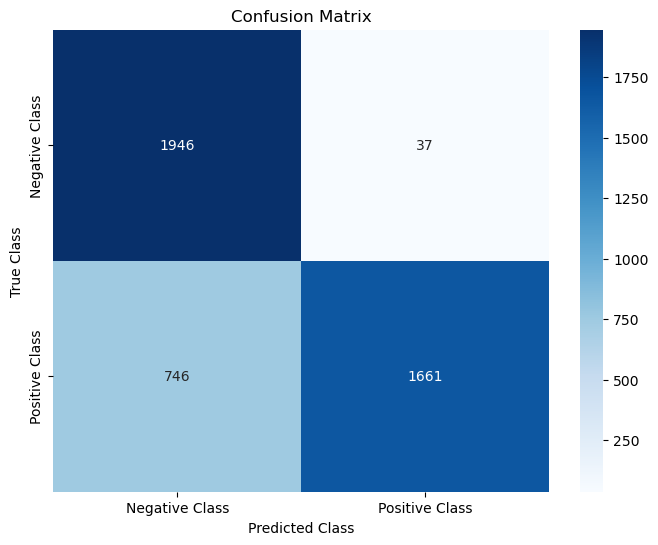

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative Class', 'Positive Class'], 
            yticklabels=['Negative Class', 'Positive Class'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

After parameter tunning, the values of the metrics improved significantly, and the predictive and classification capability of the model improved.

**LogisticRegression**

In [14]:
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
cross_val_scores = cross_val_score(logistic_regression, X_train_scaled, y_train, cv=5)
cross_val_accuracy = cross_val_scores.mean()
print("Cross-validation accuracy:", cross_val_accuracy)
logistic_regression.fit(X_train_scaled, y_train)
y_pred_test = logistic_regression.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)
precision = precision_score(y_test, y_pred_test, zero_division=1)
print("Precision:", precision)
recall = recall_score(y_test, y_pred_test, zero_division=1)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred_test)
print("F1-score:", f1)
y_proba_test = logistic_regression.predict_proba(X_test_scaled)[:, 1]
auc_roc = roc_auc_score(y_test, y_proba_test)
print("AUC-ROC:", auc_roc)

Cross-validation accuracy: 0.880959126831455
Test accuracy: 0.8703872437357631
Precision: 0.9062776304155614
Recall: 0.8516825924387204
F1-score: 0.8781323623902334
AUC-ROC: 0.9509258275734269


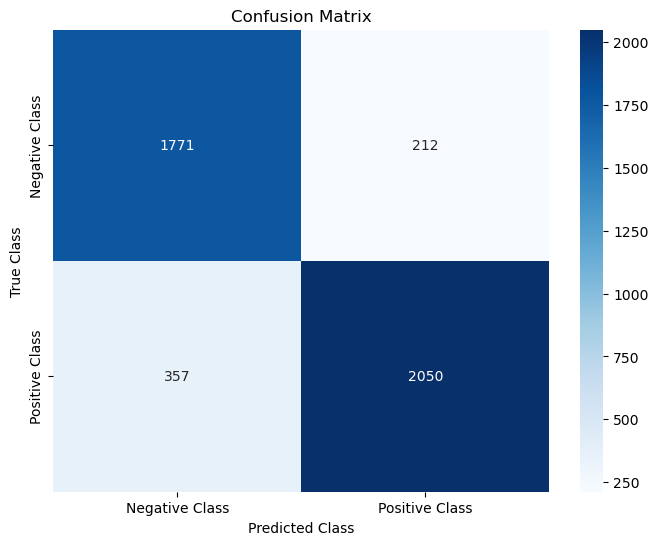

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative Class', 'Positive Class'], 
            yticklabels=['Negative Class', 'Positive Class'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

The values of the metrics are good, recall is slightly low, which might suggest that the model may have difficulty detecting all benign packages in the dataset.

**RandomForest**

In [16]:
random_forest = RandomForestClassifier(random_state=42)
cross_val_scores = cross_val_score(random_forest, X_train, y_train, cv=5)  # 5-fold cross-validation
cross_val_accuracy = cross_val_scores.mean()
print("Cross-validation accuracy:", cross_val_accuracy)
random_forest.fit(X_train, y_train)
y_pred_test = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred_test)
print("F1-score:", f1)
# Calculate the predicted probabilities of positive classes for AUC-ROC
y_proba_test = random_forest.predict_proba(X_test)[:, 1]  
auc_roc = roc_auc_score(y_test, y_proba_test)
print("AUC-ROC:", auc_roc)

Cross-validation accuracy: 0.97727401158351
Test accuracy: 0.9765375854214123
Precision: 0.9764267990074442
Recall: 0.9808890735355213
F1-score: 0.9786528497409327
AUC-ROC: 0.9931874191952748


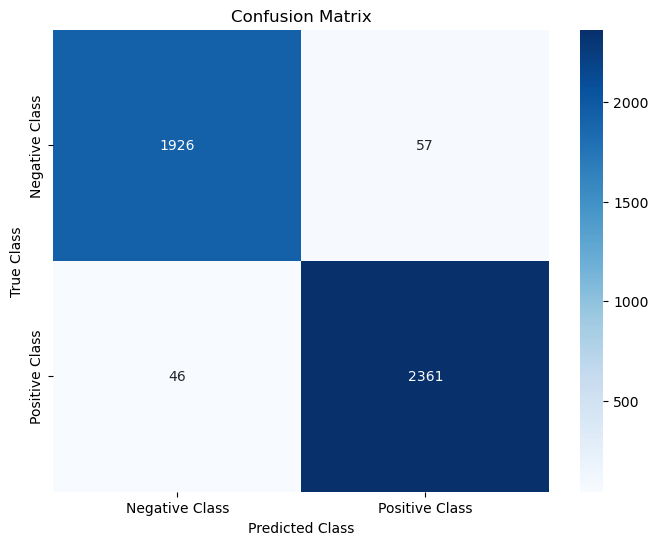

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative Class', 'Positive Class'], 
            yticklabels=['Negative Class', 'Positive Class'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

The model shows excellent prediction and classification behaviour.

In [18]:
param_grid = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30]}
random_forest = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(random_forest, param_grid, cv = 5, scoring ='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best hyperparameters for RandomForestClassifier:", best_params)
best_random_forest = grid_search.best_estimator_

# Evaluate the best RandomForestClassifier model
cross_val_scores = cross_val_score(best_random_forest, X_train, y_train, cv=5)
cross_val_accuracy = cross_val_scores.mean()
print("Cross-validation accuracy:", cross_val_accuracy)
y_pred_test = best_random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
recall = recall_score(y_test, y_pred_test)
print("Recall", recall)
f1= f1_score(y_test, y_pred_test)
print("F1-score:", f1)
y_proba_test = best_random_forest.predict_proba(X_test)[:, 1]  
auc_roc = roc_auc_score(y_test, y_proba_test)
print("AUC-ROC:", auc_roc)


Best hyperparameters for RandomForestClassifier: {'max_depth': 10, 'n_estimators': 50}
Cross-validation accuracy: 0.9792675995845144
Test accuracy: 0.9776765375854214
Precision: 0.98004158004158
Recall 0.9792272538429581
F1-score: 0.9796342477140482
AUC-ROC: 0.9962069573091259


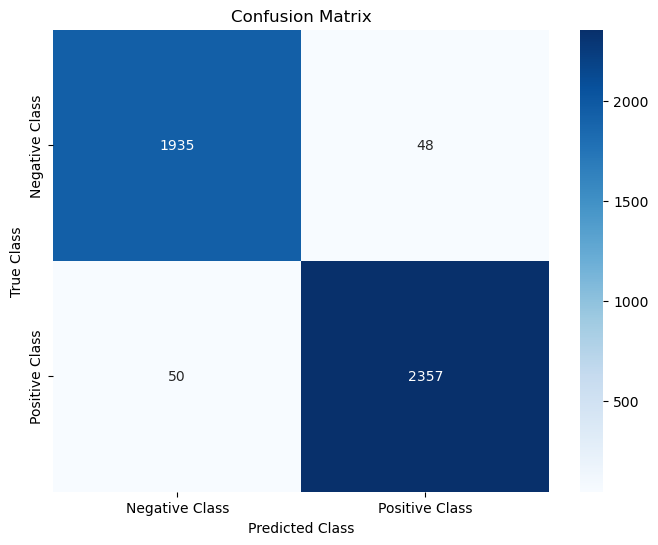

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative Class', 'Positive Class'], 
            yticklabels=['Negative Class', 'Positive Class'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Although the values obtained were already remarkable, tunning was performed to create more robust models that could generalise better to the unobserved. The observed values are slightly better than those initially identified. 

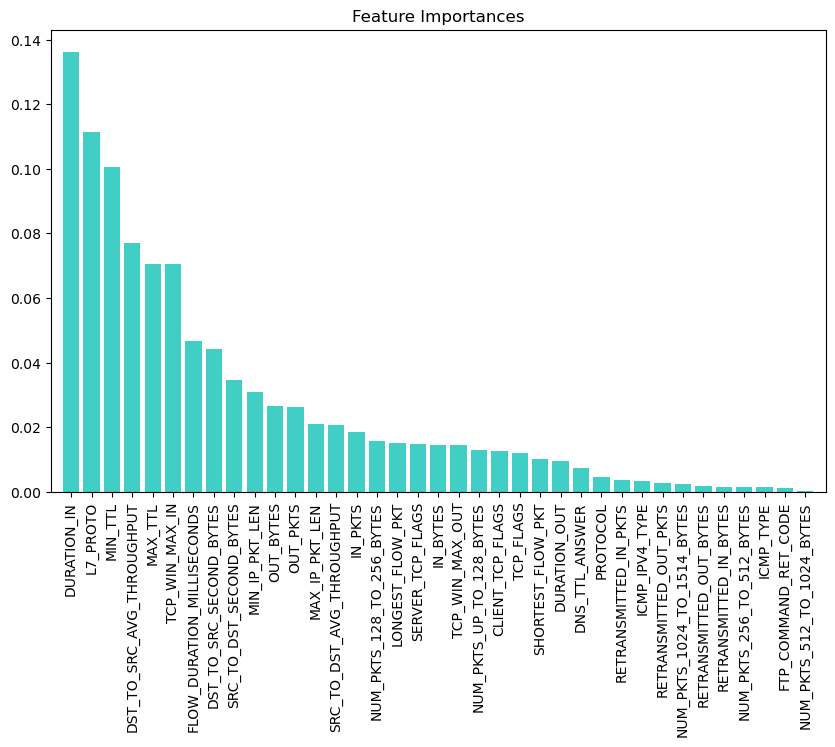

In [20]:
turquoise_color = '#41CEC5'
importances = best_random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color = turquoise_color)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

**K-Neighbors**

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
cross_val_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)  
cross_val_accuracy = cross_val_scores.mean()
print("Cross-validation accuracy:", cross_val_accuracy)
knn_classifier.fit(X_train, y_train)
y_pred_test = knn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_accuracy)
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred_test)
print("F1-score:", f1)
# Calculate the predicted probabilities of positive classes for AUC-ROC
y_proba_test = knn_classifier.predict_proba(X_test)[:, 1]  
auc_roc = roc_auc_score(y_test, y_proba_test)
print("AUC-ROC:", auc_roc)

Cross-validation accuracy: 0.9436692133866293
Test accuracy: 0.9414578587699317
Precision: 0.9380603096984516
Recall: 0.9563772330702118
F1-score: 0.9471302201193171
AUC-ROC: 0.9760221961454246


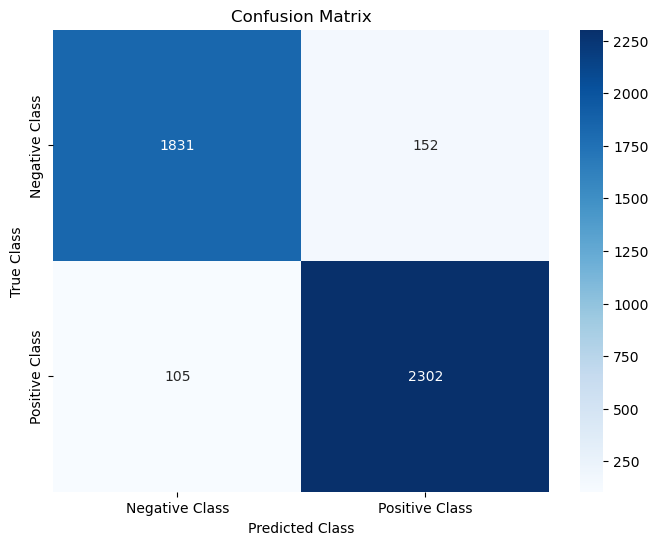

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative Class', 'Positive Class'], 
            yticklabels=['Negative Class', 'Positive Class'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Overall, the results indicate that the K-Nearest Neighbours model has solid performance in classifying network packets into benign and malignant.

In [23]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best hyperparameters found:", best_params)
best_knn_classifier = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_knn_classifier, X_train, y_train, cv=5)
cross_val_accuracy = cross_val_scores.mean()
print("Cross-validation accuracy:", cross_val_accuracy)
y_pred_test = best_knn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy", test_accuracy)
precision = precision_score(y_test, y_pred_test)
print("Precision", precision)
recall = recall_score(y_test, y_pred_test)
print("Recall", recall)
f1_knn = f1_score(y_test, y_pred_test)
print("F1-score", f1)


Best hyperparameters found: {'n_neighbors': 3}
Cross-validation accuracy: 0.9464602138803592
Test accuracy 0.9471526195899772
Precision 0.9458794587945879
Recall 0.9584545076859161
F1-score 0.9471302201193171


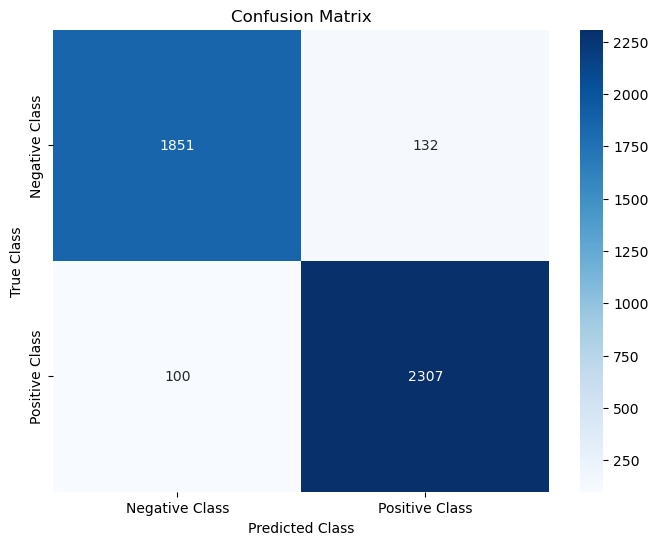

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative Class', 'Positive Class'], 
            yticklabels=['Negative Class', 'Positive Class'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Even after tuning, the metrics remain largely stable, with no significant changes.

**Results**

**Comparison of models**

In [25]:
accuracy = [
    accuracy_score(y_test, best_random_forest.predict(X_test)),
    accuracy_score(y_test, best_knn_classifier.predict(X_test)),
    accuracy_score(y_test, best_svc_classifier.predict(X_test)),
    accuracy_score(y_test, logistic_regression.predict(X_test))
]

precision = [
    precision_score(y_test, best_random_forest.predict(X_test)),
    precision_score(y_test, best_knn_classifier.predict(X_test)),
    precision_score(y_test, best_svc_classifier.predict(X_test)),
    precision_score(y_test, logistic_regression.predict(X_test))
]

recall = [
    recall_score(y_test, best_random_forest.predict(X_test)),
    recall_score(y_test, best_knn_classifier.predict(X_test)),
    recall_score(y_test, best_svc_classifier.predict(X_test)),
    recall_score(y_test, logistic_regression.predict(X_test))
]

f1 = [
    f1_score(y_test, best_random_forest.predict(X_test)),
    f1_score(y_test, best_knn_classifier.predict(X_test)),
    f1_score(y_test, best_svc_classifier.predict(X_test)),
    f1_score(y_test, logistic_regression.predict(X_test))
]

roc_auc = [
    roc_auc_score(y_test, best_random_forest.predict(X_test)),
    roc_auc_score(y_test,best_knn_classifier.predict(X_test)),
    roc_auc_score(y_test, best_svc_classifier.predict(X_test)),
    roc_auc_score(y_test, logistic_regression.predict(X_test))
]

c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [26]:
metrics = {
    'Model': ['RandomForest', 'K-Neighbors', 'SVC', 'LogisticRegression'],
    'AUC': [roc_auc_score(y_test, best_random_forest.predict(X_test)),
            roc_auc_score(y_test,best_knn_classifier.predict(X_test)),
            roc_auc_score(y_test, best_svc_classifier.predict(X_test)),
            roc_auc_score(y_test, logistic_regression.predict(X_test))],
    'Accuracy': [accuracy_score(y_test, best_random_forest.predict(X_test)),
                 accuracy_score(y_test, best_knn_classifier.predict(X_test)),
                 accuracy_score(y_test, best_svc_classifier.predict(X_test)),
                 accuracy_score(y_test, logistic_regression.predict(X_test))],
    'Precision': [precision_score(y_test, best_random_forest.predict(X_test)),
                  precision_score(y_test, best_knn_classifier.predict(X_test)),
                  precision_score(y_test, best_svc_classifier.predict(X_test)),
                  precision_score(y_test, logistic_regression.predict(X_test))],
    'Recall': [recall_score(y_test, best_random_forest.predict(X_test)),
               recall_score(y_test, best_knn_classifier.predict(X_test)),
               recall_score(y_test, best_svc_classifier.predict(X_test)),
               recall_score(y_test, logistic_regression.predict(X_test))],
    'F1-Score': [f1_score(y_test, best_random_forest.predict(X_test)),
                 f1_score(y_test, best_knn_classifier.predict(X_test)),
                 f1_score(y_test, best_svc_classifier.predict(X_test)),
                 f1_score(y_test, logistic_regression.predict(X_test))]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


                Model       AUC  Accuracy  Precision    Recall  F1-Score
0        RandomForest  0.977511  0.977677   0.980042  0.979227  0.979634
1         K-Neighbors  0.945944  0.947153   0.945879  0.958455  0.952125
2                 SVC  0.835706  0.821640   0.978210  0.690071  0.809257
3  LogisticRegression  0.792684  0.785421   0.868276  0.717491  0.785714


c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


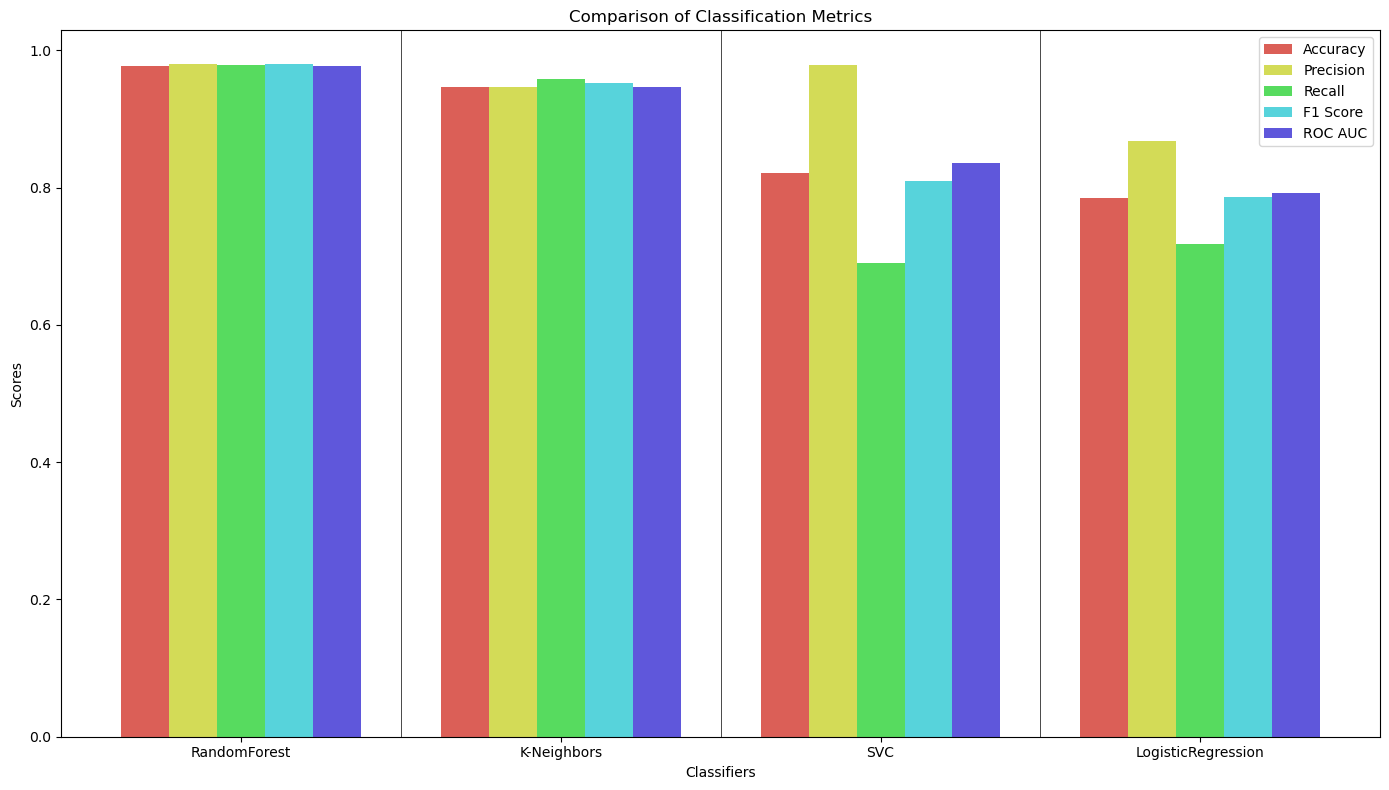

In [27]:
labels = ['RandomForest', 'K-Neighbors', 'SVC', 'LogisticRegression']
x = np.arange(len(labels))
width = 0.15

palette = sns.color_palette('hls')
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy', color=palette[0])
rects2 = ax.bar(x - width, precision, width, label='Precision', color=palette[1])
rects3 = ax.bar(x, recall, width, label='Recall', color=palette[2])
rects4 = ax.bar(x + width, f1, width, label='F1 Score', color=palette[3])
rects5 = ax.bar(x + 2*width, roc_auc, width, label='ROC AUC', color=palette[4])

for i in range(len(labels) - 1):
    ax.axvline(x=i + 0.5, color='black', linewidth=0.5)


ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.show()


c:\Users\valer\anaconda3\envs\ML\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


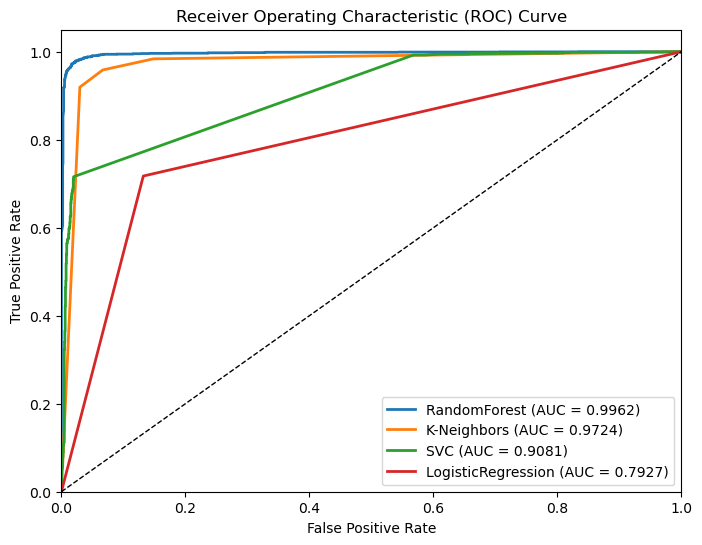

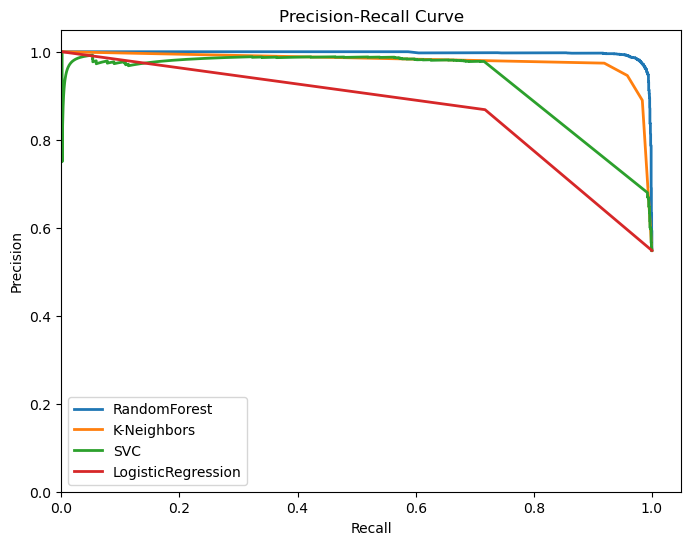

In [28]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

y_proba_test_model1 = best_random_forest.predict_proba(X_test)[:, 1]
y_proba_test_model2 = best_knn_classifier.predict_proba(X_test)[:, 1]
y_proba_test_model3 = best_svc_classifier.decision_function(X_test)
y_proba_test_model4 = logistic_regression.predict_proba(X_test)[:, 1]


# Calculate ROC curves
fpr_model1, tpr_model1, _ = roc_curve(y_test, y_proba_test_model1)
fpr_model2, tpr_model2, _ = roc_curve(y_test, y_proba_test_model2)
fpr_model3, tpr_model3, _ = roc_curve(y_test, y_proba_test_model3)
fpr_model4, tpr_model4, _ = roc_curve(y_test, y_proba_test_model4)

# Calculate the area under the ROC curve (AUC)
roc_auc_model1 = auc(fpr_model1, tpr_model1)
roc_auc_model2 = auc(fpr_model2, tpr_model2)
roc_auc_model3 = auc(fpr_model3, tpr_model3)
roc_auc_model4 = auc(fpr_model4, tpr_model4)

plt.figure(figsize=(8, 6))
plt.plot(fpr_model1, tpr_model1, color=colors[0], lw=2, label='RandomForest (AUC = %0.4f)' % roc_auc_model1)
plt.plot(fpr_model2, tpr_model2, color=colors[1], lw=2, label='K-Neighbors (AUC = %0.4f)' % roc_auc_model2)
plt.plot(fpr_model3, tpr_model3, color=colors[2], lw=2, label='SVC (AUC = %0.4f)' % roc_auc_model3)
plt.plot(fpr_model4, tpr_model4, color=colors[3], lw=2, label='LogisticRegression (AUC = %0.4f)' % roc_auc_model4)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculates Precision-Recall curves
precision_model1, recall_model1, _ = precision_recall_curve(y_test, y_proba_test_model1)
precision_model2, recall_model2, _ = precision_recall_curve(y_test, y_proba_test_model2)
precision_model3, recall_model3, _ = precision_recall_curve(y_test, y_proba_test_model3)
precision_model4, recall_model4, _ = precision_recall_curve(y_test, y_proba_test_model4)

plt.figure(figsize=(8, 6))
plt.plot(recall_model1, precision_model1, color=colors[0], lw=2, label='RandomForest')
plt.plot(recall_model2, precision_model2, color=colors[1], lw=2, label='K-Neighbors')
plt.plot(recall_model3, precision_model3, color=colors[2], lw=2, label='SVC')
plt.plot(recall_model4, precision_model4, color=colors[3], lw=2, label='LogisticRegression')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
